In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Step 1. Measure the Determinants of Confidence Including Crime Outcomes

In [3]:
outcome_df = pd.read_csv('C:/Users/20220678/Microsoft VS Code/JBG050-DC2-GRP21/data/curated_data/outcome.csv')

print(outcome_df['Outcome type'].unique())

['Investigation complete; no suspect identified' 'Local resolution'
 'Suspect charged' 'Offender given penalty notice'
 'Offender given a caution' 'Offender given a drugs possession warning'
 'Suspect charged as part of another case'
 'Formal action is not in the public interest'
 'Unable to prosecute suspect']


In [15]:
def categorize_outcome(outcome):
    successful_outcomes = [
        'Suspect charged', 
        'Offender given penalty notice',
        'Offender given a caution', 
        'Offender given a drugs possession warning',
        'Suspect charged as part of another case'
    ]
    unsuccessful_outcomes = [
        'Investigation complete; no suspect identified', 
        'Formal action is not in the public interest',
        'Unable to prosecute suspect'
    ]
    
    if outcome in successful_outcomes:
        return "Successful"
    elif outcome in unsuccessful_outcomes:
        return "Unsuccessful"
    else:
        return "Other"

outcome_df['Intervention_Success'] = outcome_df['Outcome type'].apply(categorize_outcome)

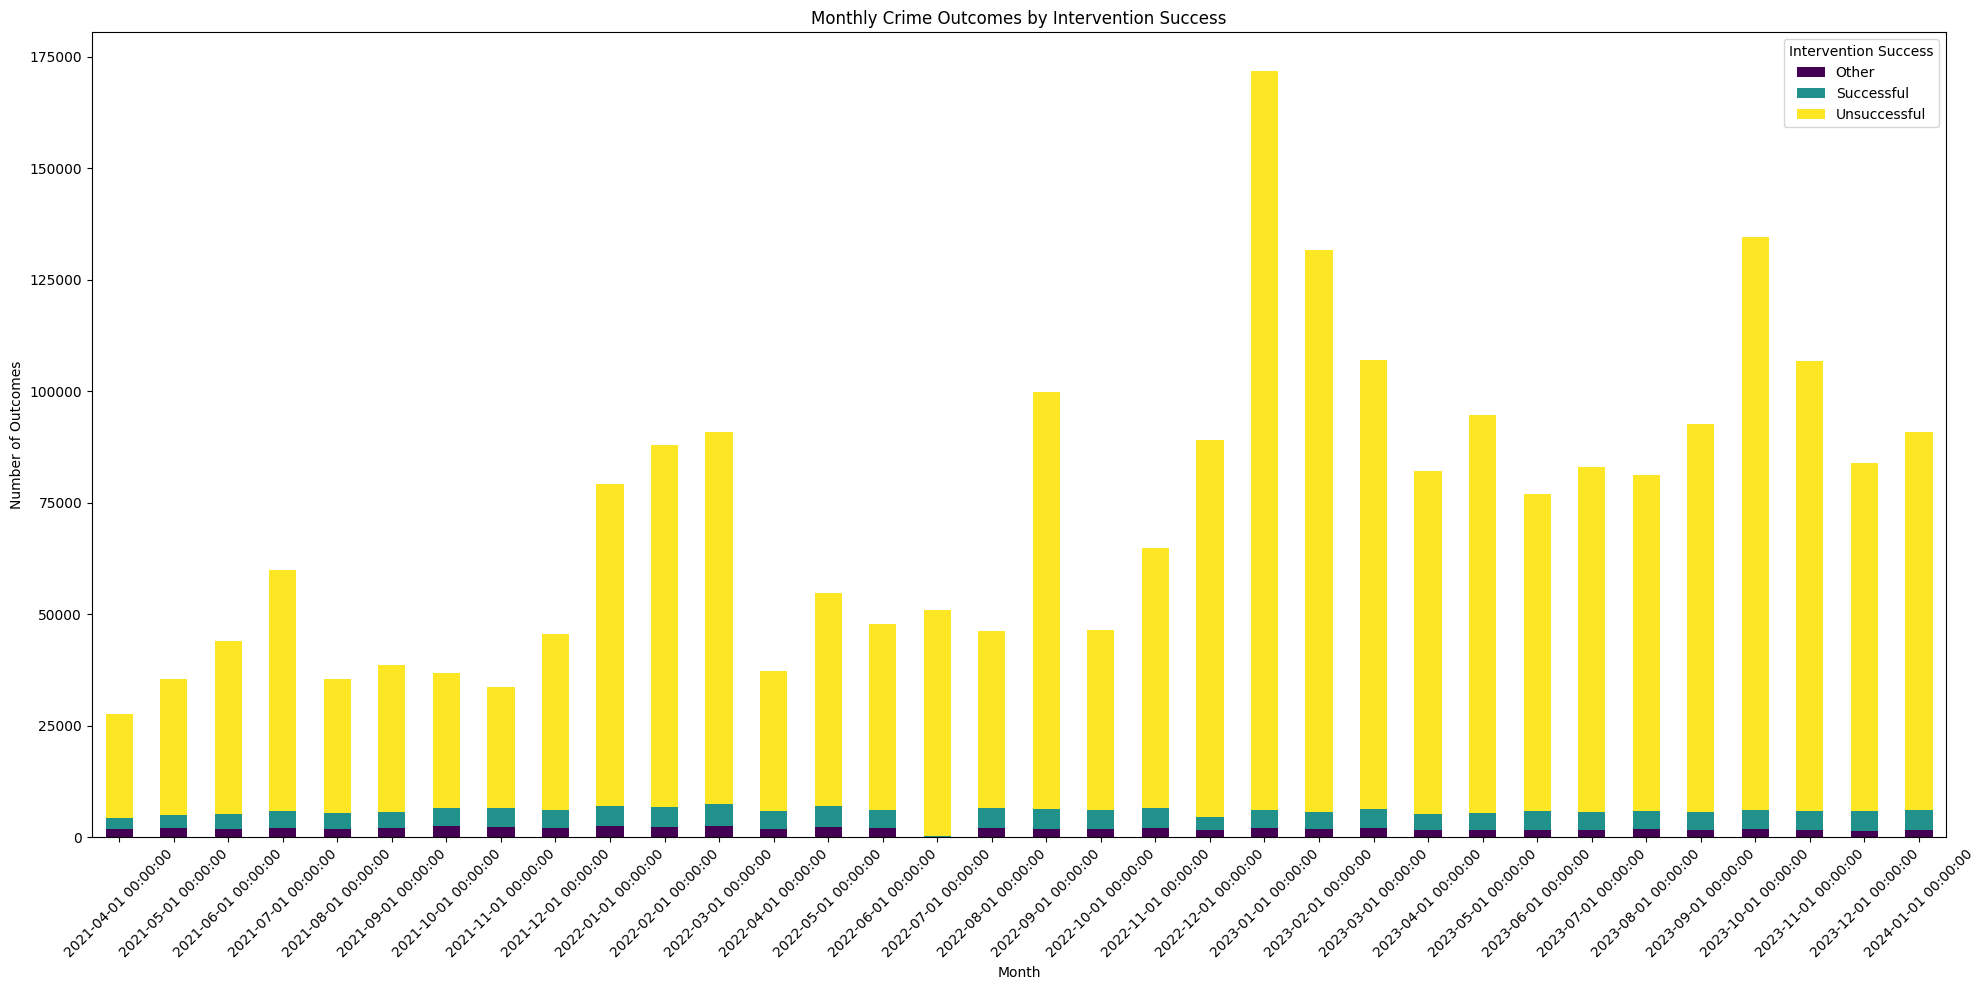

In [17]:
monthly_outcomes = outcome_df.groupby(['Month', 'Intervention_Success']).size().unstack(fill_value=0)

monthly_outcomes.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='viridis')
plt.title('Monthly Crime Outcomes by Intervention Success')
plt.xlabel('Month')
plt.ylabel('Number of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='Intervention Success')
plt.tight_layout()
plt.show()

Step 2. Data Preparation

In [86]:
survey_19_20_path = "data\pas_data_ward_level\PAS_ward_level_FY_19_20.csv"
df = pd.read_csv(survey_19_20_path)

effectiveness_columns = ['Q79I', 'Q79B', 'Q79D', 'Q79E', 'NQ79D']
fairness_engagement_columns = ['Q62B', 'Q62C', 'XQ128C', 'A121']
accountability_columns = ['NQ135BH', 'XQ122A', 'XQ122B']
confidence_columns = ['Q65', 'Q21', 'Q131']  # add anything else we consider a determinant

effectiveness_df = df[effectiveness_columns]
fairness_engagement_df = df[fairness_engagement_columns]
accountability_df = df[accountability_columns]
confidence_df = df[confidence_columns]


C:\Users\20220678\AppData\Local\Temp\ipykernel_16428\1288655043.py:3: DtypeWarning: Columns (41,42,43,131,132,133,213,214,435,444,451) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(survey_19_20_path)


Step 3. Aggregate Responses

In [87]:
# Mode of the responses
mode_effectiveness = effectiveness_df.mode().iloc[0]
mode_fairness_engagement = fairness_engagement_df.mode().iloc[0]
mode_accountability = accountability_df.mode().iloc[0]
mode_confidence = confidence_df.mode().iloc[0]

print("Mode of Effectiveness Questions: \n", mode_effectiveness, "\n")
print("Mode of Fairness and Engagement Questions: \n", mode_fairness_engagement, "\n")
print("Mode of Accountability Questions: \n", mode_accountability, "\n")
print("Mode of Confidence Questions: \n", mode_confidence, "\n")

Mode of Effectiveness Questions: 
 Q79I     5
Q79B     5
Q79D     5
Q79E     5
NQ79D    4
Name: 0, dtype: object 

Mode of Fairness and Engagement Questions: 
 Q62B         Tend to agree
Q62C         Tend to agree
XQ128C                 Yes
A121      Fairly confident
Name: 0, dtype: object 

Mode of Accountability Questions: 
 NQ135BH       Tend to agree
XQ122A     Fairly confident
XQ122B     Fairly confident
Name: 0, dtype: object 

Mode of Confidence Questions: 
 Q65              Less often
Q21             Fairly safe
Q131    Not at all informed
Name: 0, dtype: object 



In [88]:
def recode_responses(value, question_type):
    # I tried to map answers to a number
    agreement_map = {'Strongly agree': 5, 'Tend to agree': 4, 'Neither agree nor disagree': 3,
                     'Tend to disagree': 2, 'Strongly disagree': 1, "Don't know": None, 'Refused': None, 'Not Asked': None}
    confidence_map = {'Very confident': 4, 'Fairly confident': 3, 'Not very confident': 2, 
                      'Not at all confident': 1, "Don't know": None, 'Refused': None, 'Not Asked': None}
    safety_map = {'Very safe': 4, 'Fairly safe': 3, 'Fairly unsafe': 2, 'Very unsafe': 1, 
                  '(spontaneous) Do not go out at all': None, '(spontaneous) Do not go out alone': None,
                  "Don't know": None, 'Refused': None, 'Not Asked': None}
    
    if question_type == "agreement":
        return agreement_map.get(value, None)
    elif question_type == "confidence":
        return confidence_map.get(value, None)
    elif question_type == "safety":
        return safety_map.get(value, None)
    else:
        return None


In [89]:
# Examples
df['Q62B'] = df['Q62B'].apply(lambda x: recode_responses(x, 'agreement'))
df['A121'] = df['A121'].apply(lambda x: recode_responses(x, 'confidence'))
df['Q21'] = df['Q21'].apply(lambda x: recode_responses(x, 'safety'))

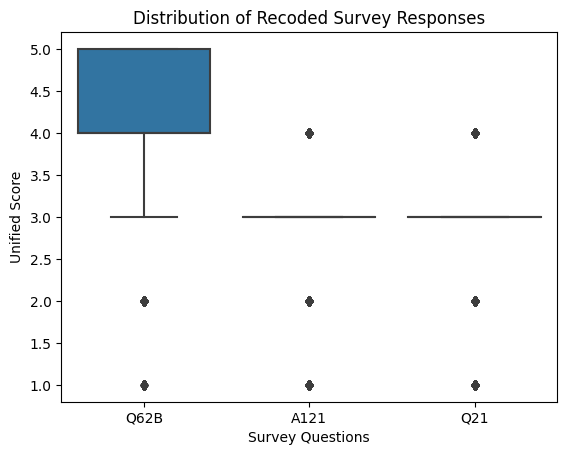

In [90]:
sns.boxplot(data=df[['Q62B', 'A121', 'Q21']])
plt.title('Distribution of Recoded Survey Responses')
plt.ylabel('Unified Score')
plt.xlabel('Survey Questions')
plt.show()